 # Opis notatnika
 Zmierzamy do końca analizy danych, które zostały nam udostępnione. Ten krok dodaje jeszcze więcej informacji do naszego wyjściowego zbioru. Tym razem sprawdzimy między innymi to, czy opóźnienia lotów zależne są od trasy czy warunków pogodowych.

 Zanim jednak do tego przejdziemy, należy, podobnie jak w poprzednich krokach, skonfigurować odpowiednio notatnik.
 
 W tej części warsztatu ponownie wcielasz się w rolę Analiyka Danych, którego zadaniem jest wykonanie analizy eksplotacyjnej zbioru danych - jedno z wymagań dostarczonych przez klienta.

 Tutaj zaimportuj wymagane biblioteki

In [91]:
import mysql.connector as sql
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np

 ## Połączenie z bazą danych
 Tutaj uzupełnij konfigurację połączenia

In [92]:
username = 'postgres'
password = '9292'

host = 'localhost'
database = 'airlines'
port = 5432

 Tutaj stwórz zmienną engine, która zostanie użyta do połączenia z bazą danych

In [93]:
url = f"postgresql://{username}:{password}@{host}:{port}/{database}"
engine = sqlalchemy.create_engine(url)

 Tutaj uzupełnij implementację metody `read_sql_table`

In [94]:
def read_sql_table(table):
    df = pd.read_sql(f"SELECT * FROM {table}", url)
    return df

 Tutaj zaczytaj zapisaną wcześniej ramkę danych `flight_df` do zmniennej o takiej samej nazwie

In [95]:
flight_df = pd.read_csv("C:/Users/User/OneDrive - AEI/Pulpit/Pliki_do_Portfolio_Lab/data/raw/flight_df_02.csv")
pd.set_option('display.max_columns', None)
flight_df 

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,dep_time_blk,crs_arr_time,arr_time,arr_delay_new,arr_time_blk,cancelled,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg
0,1,1,20,7,WN,N204WN,682,10397,11292,605,602.0,0.0,0600-0659,730,726.0,0.0,0700-0759,0.0,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,2005.0,2005-2007
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,2114.0,0.0,2100-2159,2250,2239.0,0.0,2200-2259,0.0,210.0,205.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,2016.0,2014-2016
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,1807.0,7.0,1800-1859,1930,1947.0,17.0,1900-1959,0.0,210.0,220.0,1199.0,5,4.0,0.0,10.0,0.0,3.0,2019,False,True,1100-1199,1998.0,1996-1998
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,1354.0,0.0,1300-1359,1520,1518.0,0.0,1500-1559,0.0,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,1998.0,1996-1998
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,1125.0,0.0,1100-1159,1325,1329.0,4.0,1300-1359,0.0,120.0,124.0,581.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,True,500-599,2001.0,1999-2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1382967,12,11,3,DL,N321DH,1826,13303,10397,1807,1822.0,15.0,1800-1859,2008,2016.0,8.0,2000-2059,0.0,121.0,114.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,500-599,2017.0,2017-2019
1057387,1382968,12,11,3,DL,N329NW,1982,13303,12953,1959,2022.0,23.0,1900-1959,2256,2320.0,24.0,2200-2259,0.0,177.0,178.0,1096.0,5,5.0,0.0,19.0,0.0,0.0,2019,True,False,1000-1099,1992.0,1990-1992
1057388,1382969,12,11,3,DL,N331NW,1987,13303,10397,1125,1122.0,0.0,1100-1159,1323,1259.0,0.0,1300-1359,0.0,118.0,97.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,500-599,1992.0,1990-1992
1057389,1382970,12,11,3,DL,N309DN,2151,13303,12953,700,750.0,50.0,0700-0759,1000,1106.0,66.0,1000-1059,0.0,180.0,196.0,1096.0,5,0.0,0.0,66.0,0.0,0.0,2019,True,False,1000-1099,2016.0,2014-2016


 # Wzbogacenie o `airport_list`
 Wczytaj do obszaru roboczego tabelę `airport_list` używając procedury `read_sql_table`. Wykonaj poniższe ćwiczenia:  
 1. Sprawdź, czy klucz `origin_airport_id` jest unikalny, tj. nie ma dwóch takich samych wartości w kolumnie `origin_airport_id`.  
 1. Jeżeli duplikaty występują, usuń je w najdogodniejszy dla Ciebie sposób.  
 1. Jeśli duplikaty nie występują, złącz ramki `airport_list_df` wraz z aktualną `flight_df`, używając kolumny `origin_airport_id` oraz złączenia typu `LEFT JOIN`. Z ramki `airport_list_df` interesuje nas dodanie kolumny `origin_city_name`.  
 1. Dodatkowo dokonaj jeszcze raz złączenia ramki `flight_df` z `airport_list_df`, tym razem jednak złącz kolumnę `destination_airport_id` wraz z `origin_airport_id`. Podobnie jak wcześniej, interesuje nas kolumna `origin_city_name`, jedank ona powinna zostać wyświetlona jako `destination_city_name`

 Tutaj wczytaj ramkę `airport_list_df`

In [96]:
airport_list_df = read_sql_table('airport_list')
airport_list_df

,id,origin_airport_id,display_airport_name,origin_city_name,name
0,1,11638,Fresno Air Terminal,"Fresno, CA","FRESNO YOSEMITE INTERNATIONAL, CA US"
1,2,13342,General Mitchell Field,"Milwaukee, WI","MILWAUKEE MITCHELL AIRPORT, WI US"
2,3,13244,Memphis International,"Memphis, TN","MEMPHIS INTERNATIONAL AIRPORT, TN US"
3,4,15096,Syracuse Hancock International,"Syracuse, NY","SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US"
4,5,10397,Atlanta Municipal,"Atlanta, GA",ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...
...,...,...,...,...,...
92,93,13198,Kansas City International,"Kansas City, MO","KANSAS CITY INTERNATIONAL AIRPORT, MO US"
93,94,10423,Austin - Bergstrom International,"Austin, TX","AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US"
94,95,15370,Tulsa International,"Tulsa, OK","OKLAHOMA CITY WILL ROGERS WORLD AIRPORT, OK US"
95,96,13303,Miami International,"Miami, FL","MIAMI INTERNATIONAL AIRPORT, FL US"


 Tutaj sprawdż, czy występują duplikaty dla kolumny `origin_airport_id`

In [97]:
# Sprawdzenie, czy origin_airport_id jest unikalny
is_unique = airport_list_df['origin_airport_id'].is_unique
print(f"Is origin_airport_id unique? {is_unique}")

Is origin_airport_id unique? True


 Tutaj dokonaj złączenia ramki `flight_df` oraz `airport_list_df` używając `origin_airport_id`

In [98]:
# Złączenie ramki danych flight_df z airport_list_df
flight_df = pd.merge(flight_df, airport_list_df[['origin_airport_id', 'origin_city_name']],
                     on='origin_airport_id', how='left')
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,dep_time_blk,crs_arr_time,arr_time,arr_delay_new,arr_time_blk,cancelled,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg,origin_city_name
0,1,1,20,7,WN,N204WN,682,10397,11292,605,602.0,0.0,0600-0659,730,726.0,0.0,0700-0759,0.0,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,2005.0,2005-2007,"Atlanta, GA"
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,2114.0,0.0,2100-2159,2250,2239.0,0.0,2200-2259,0.0,210.0,205.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,2016.0,2014-2016,"Atlanta, GA"
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,1807.0,7.0,1800-1859,1930,1947.0,17.0,1900-1959,0.0,210.0,220.0,1199.0,5,4.0,0.0,10.0,0.0,3.0,2019,False,True,1100-1199,1998.0,1996-1998,"Atlanta, GA"
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,1354.0,0.0,1300-1359,1520,1518.0,0.0,1500-1559,0.0,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,1998.0,1996-1998,"Atlanta, GA"
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,1125.0,0.0,1100-1159,1325,1329.0,4.0,1300-1359,0.0,120.0,124.0,581.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,True,500-599,2001.0,1999-2001,"Atlanta, GA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1382967,12,11,3,DL,N321DH,1826,13303,10397,1807,1822.0,15.0,1800-1859,2008,2016.0,8.0,2000-2059,0.0,121.0,114.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,500-599,2017.0,2017-2019,"Miami, FL"
1057387,1382968,12,11,3,DL,N329NW,1982,13303,12953,1959,2022.0,23.0,1900-1959,2256,2320.0,24.0,2200-2259,0.0,177.0,178.0,1096.0,5,5.0,0.0,19.0,0.0,0.0,2019,True,False,1000-1099,1992.0,1990-1992,"Miami, FL"
1057388,1382969,12,11,3,DL,N331NW,1987,13303,10397,1125,1122.0,0.0,1100-1159,1323,1259.0,0.0,1300-1359,0.0,118.0,97.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,500-599,1992.0,1990-1992,"Miami, FL"
1057389,1382970,12,11,3,DL,N309DN,2151,13303,12953,700,750.0,50.0,0700-0759,1000,1106.0,66.0,1000-1059,0.0,180.0,196.0,1096.0,5,0.0,0.0,66.0,0.0,0.0,2019,True,False,1000-1099,2016.0,2014-2016,"Miami, FL"


 Tutaj dokonaj złączenia ramki `flight_df` oraz `airport_list_df` używając `destination_airport_id`

In [99]:
flight_df = pd.merge(flight_df,
                     airport_list_df[['origin_airport_id', 'origin_city_name']],
                     left_on='dest_airport_id',
                     right_on='origin_airport_id',
                     how='left')
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id_x,dest_airport_id,crs_dep_time,dep_time,dep_delay,dep_time_blk,crs_arr_time,arr_time,arr_delay_new,arr_time_blk,cancelled,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg,origin_city_name_x,origin_airport_id_y,origin_city_name_y
0,1,1,20,7,WN,N204WN,682,10397,11292,605,602.0,0.0,0600-0659,730,726.0,0.0,0700-0759,0.0,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,2005.0,2005-2007,"Atlanta, GA",11292.0,"Denver, CO"
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,2114.0,0.0,2100-2159,2250,2239.0,0.0,2200-2259,0.0,210.0,205.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,2016.0,2014-2016,"Atlanta, GA",11292.0,"Denver, CO"
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,1807.0,7.0,1800-1859,1930,1947.0,17.0,1900-1959,0.0,210.0,220.0,1199.0,5,4.0,0.0,10.0,0.0,3.0,2019,False,True,1100-1199,1998.0,1996-1998,"Atlanta, GA",11292.0,"Denver, CO"
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,1354.0,0.0,1300-1359,1520,1518.0,0.0,1500-1559,0.0,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,1998.0,1996-1998,"Atlanta, GA",11292.0,"Denver, CO"
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,1125.0,0.0,1100-1159,1325,1329.0,4.0,1300-1359,0.0,120.0,124.0,581.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,True,500-599,2001.0,1999-2001,"Atlanta, GA",11697.0,"Fort Lauderdale, FL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1382967,12,11,3,DL,N321DH,1826,13303,10397,1807,1822.0,15.0,1800-1859,2008,2016.0,8.0,2000-2059,0.0,121.0,114.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,500-599,2017.0,2017-2019,"Miami, FL",10397.0,"Atlanta, GA"
1057387,1382968,12,11,3,DL,N329NW,1982,13303,12953,1959,2022.0,23.0,1900-1959,2256,2320.0,24.0,2200-2259,0.0,177.0,178.0,1096.0,5,5.0,0.0,19.0,0.0,0.0,2019,True,False,1000-1099,1992.0,1990-1992,"Miami, FL",12953.0,"New York, NY"
1057388,1382969,12,11,3,DL,N331NW,1987,13303,10397,1125,1122.0,0.0,1100-1159,1323,1259.0,0.0,1300-1359,0.0,118.0,97.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,500-599,1992.0,1990-1992,"Miami, FL",10397.0,"Atlanta, GA"
1057389,1382970,12,11,3,DL,N309DN,2151,13303,12953,700,750.0,50.0,0700-0759,1000,1106.0,66.0,1000-1059,0.0,180.0,196.0,1096.0,5,0.0,0.0,66.0,0.0,0.0,2019,True,False,1000-1099,2016.0,2014-2016,"Miami, FL",12953.0,"New York, NY"


In [100]:
# Przemianowanie kolumny origin_city_name na destination_city_name
flight_df.rename(columns={'origin_city_name_y': 'destination_city_name'}, inplace=True)
# Usunięcie zbędnej kolumny airport_id
flight_df.drop(columns=['origin_airport_id_y'], inplace=True)

In [101]:
#zmiana nazw kolumn
flight_df = flight_df.rename(columns={'origin_city_name_x': 'origin_city_name'})
flight_df = flight_df.rename(columns={'origin_airport_id_x': 'origin_airport_id'})
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,dep_time_blk,crs_arr_time,arr_time,arr_delay_new,arr_time_blk,cancelled,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg,origin_city_name,destination_city_name
0,1,1,20,7,WN,N204WN,682,10397,11292,605,602.0,0.0,0600-0659,730,726.0,0.0,0700-0759,0.0,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,2005.0,2005-2007,"Atlanta, GA","Denver, CO"
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,2114.0,0.0,2100-2159,2250,2239.0,0.0,2200-2259,0.0,210.0,205.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,2016.0,2014-2016,"Atlanta, GA","Denver, CO"
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,1807.0,7.0,1800-1859,1930,1947.0,17.0,1900-1959,0.0,210.0,220.0,1199.0,5,4.0,0.0,10.0,0.0,3.0,2019,False,True,1100-1199,1998.0,1996-1998,"Atlanta, GA","Denver, CO"
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,1354.0,0.0,1300-1359,1520,1518.0,0.0,1500-1559,0.0,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,1998.0,1996-1998,"Atlanta, GA","Denver, CO"
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,1125.0,0.0,1100-1159,1325,1329.0,4.0,1300-1359,0.0,120.0,124.0,581.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,True,500-599,2001.0,1999-2001,"Atlanta, GA","Fort Lauderdale, FL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1382967,12,11,3,DL,N321DH,1826,13303,10397,1807,1822.0,15.0,1800-1859,2008,2016.0,8.0,2000-2059,0.0,121.0,114.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,500-599,2017.0,2017-2019,"Miami, FL","Atlanta, GA"
1057387,1382968,12,11,3,DL,N329NW,1982,13303,12953,1959,2022.0,23.0,1900-1959,2256,2320.0,24.0,2200-2259,0.0,177.0,178.0,1096.0,5,5.0,0.0,19.0,0.0,0.0,2019,True,False,1000-1099,1992.0,1990-1992,"Miami, FL","New York, NY"
1057388,1382969,12,11,3,DL,N331NW,1987,13303,10397,1125,1122.0,0.0,1100-1159,1323,1259.0,0.0,1300-1359,0.0,118.0,97.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,500-599,1992.0,1990-1992,"Miami, FL","Atlanta, GA"
1057389,1382970,12,11,3,DL,N309DN,2151,13303,12953,700,750.0,50.0,0700-0759,1000,1106.0,66.0,1000-1059,0.0,180.0,196.0,1096.0,5,0.0,0.0,66.0,0.0,0.0,2019,True,False,1000-1099,2016.0,2014-2016,"Miami, FL","New York, NY"


### Sprawdzenie
Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [102]:
# assert 'origin_city_name' in flight_df.columns, 'Brak kolumny `origin_city_name` w ramce flight_df'
assert 'destination_city_name' in flight_df.columns, 'Brak kolumny `destination_city_name` w ramce flight_df'

flight_df_expected_rows_amount = 1057391
assert flight_df.shape[0] == flight_df_expected_rows_amount, 'Ups, zmieniła się liczba wierszy...'

 ## Analiza według lotnisk oraz tras
 Wykonaj poniższe polecenia:  
 1. Wyznacz lotniska, z których **odlatywało** najwięcej samolotów. Wynik zapisz do ramki `top_airports_origin_df`.
 1. Wyznacz lotnika, na których najwięcej lotów **się kończyło**. Wynik zapisz do ramki `top_airports_destination_df`.  
 1. Wyznacz najczęściej uczęszczaną trasę, wynik zapisz do ramki `top_route_df`.  
 1. Przy założeniu, że reprezentatywna liczba lotów na trasie wynosi ponad 500, wyznacz dodatkowo top 10:  
     - tras z **najmniejszym odsetkiem opóźnień**, wynik zapisz do ramki `least_route_delays_df`.  
     - tras z **największym odsetkiem opóźnień**, wynik zapisz do ramki `top_route_delays_df`.

 Tutaj wyznacz ramkę `top_airports_origin_df`

In [103]:
# Wiersze, gdzie lot nie jest anulowany:
not_delayed = flight_df[flight_df['is_delayed'] == False]
not_delayed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 855374 entries, 0 to 1057390
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     855374 non-null  int64  
 1   month                  855374 non-null  int64  
 2   day_of_month           855374 non-null  int64  
 3   day_of_week            855374 non-null  int64  
 4   op_unique_carrier      855374 non-null  object 
 5   tail_num               855374 non-null  object 
 6   op_carrier_fl_num      855374 non-null  int64  
 7   origin_airport_id      855374 non-null  int64  
 8   dest_airport_id        855374 non-null  int64  
 9   crs_dep_time           855374 non-null  int64  
 10  dep_time               855374 non-null  float64
 11  dep_delay              855374 non-null  float64
 12  dep_time_blk           855374 non-null  object 
 13  crs_arr_time           855374 non-null  int64  
 14  arr_time               855296 non-null  

In [104]:
# Grupowanie danych według lotnisk wylotu i zliczanie liczby lotów
top_airports_origin_df = not_delayed.groupby('origin_airport_id').size().reset_index(name='number_of_flights')
top_airports_origin_df

,origin_airport_id,number_of_flights
0,10299,6351
1,10397,100247
2,10721,44031
3,10821,9721
4,11057,9762
5,11193,4223
6,11259,4701
7,11278,24487
8,11292,50311
9,11298,30816


In [105]:
# Sortowanie według liczby lotów malejąco
top_airports_origin_df = top_airports_origin_df.sort_values(by='number_of_flights', ascending=False)
top_airports_origin_df.head(10)

,origin_airport_id,number_of_flights
1,10397,100247
28,13930,80848
20,12892,70978
8,11292,50311
21,12953,45530
2,10721,44031
33,14747,41518
34,14771,39294
9,11298,30816
19,12889,30804


In [106]:
# Grupowanie danych według lotnisk przylotu i zliczanie liczby lotów
top_airports_destination_df = not_delayed.groupby('dest_airport_id').size().reset_index(name='number_of_flights')
# Sortowanie według liczby lotów malejąco
top_airports_destination_df = top_airports_destination_df.sort_values(by='number_of_flights', ascending=False)
top_airports_destination_df.head(10)

,dest_airport_id,number_of_flights
1,10397,102728
29,13930,79582
21,12892,71954
9,11292,51820
22,12953,43310
3,10721,42548
34,14747,41564
35,14771,37156
20,12889,31161
10,11298,31126


In [107]:
# Tworzenie kolumny 'route' zawierającej połączenia lotnisk w formie krotki
not_delayed['route'] = list(zip(not_delayed['origin_airport_id'], not_delayed['dest_airport_id']))

# Grupowanie danych według tras (połączeń lotnisk) i zliczanie liczby lotów na każdej trasie
top_route_df = not_delayed.groupby('route').size().reset_index(name='number_of_flights')

# Sortowanie według liczby lotów malejąco
top_route_df = top_route_df.sort_values(by='number_of_flights', ascending=False)

top_route_df

C:\Users\User\AppData\Local\Temp\ipykernel_8020\2720015385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_delayed['route'] = list(zip(not_delayed['origin_airport_id'], not_delayed['dest_airport_id']))


,route,number_of_flights
141,"(14771, 12892)",11272
68,"(12478, 12892)",10972
91,"(12953, 13930)",10809
83,"(12892, 14771)",10796
113,"(13930, 12953)",10321
...,...,...
22,"(10721, 11618)",3986
55,"(11618, 10721)",3940
96,"(13204, 14843)",3866
111,"(13930, 11618)",3823


 # Wzbogacenie o dane pogodowe
 Używając procedury `read_sql_table`, wczytaj tabelę `airport_weather` do ramki `airport_weather_df`. Następnie wykonaj następujące polecenia:  
 1. Pozostaw w ramce tylko następujące kolumny: `['station', 'name', 'date', 'prcp', 'snow', 'snwd', 'tmax', 'awnd']`.  
 1. Połącz ramki `airport_list_df` wraz z `airport_weather_df` po odpowiedniej kolumnie używając takiego złączenia, aby w wyniku usunąć te wiersze (lotniska), które nie posiadają danych pogodowych. Dodatkowo, upewnij się, że zostanie tylko dodana kolumna `origin_airport_id`.

 Tutaj wczytaj ramkę `airport_weather`

In [108]:
airport_weather_df = read_sql_table('airport_weather')
airport_weather_df

,id,station,name,date,awnd,pgtm,prcp,snow,snwd,tavg,tmax,tmin,wdf2,wdf5,wsf2,wsf5,wt01,wt02,wt03,wt04,wt05,wt06,wt07,wt08,wt09,wesd,wt10,psun,tsun,sn32,sx32,tobs,wt11,wt18
0,1,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-01,4.70,NaN,0.14,0.0,0.0,64.0,66.0,57.0,310.0,310.0,15.0,19.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,2,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-02,4.92,NaN,0.57,0.0,0.0,56.0,59.0,49.0,70.0,50.0,12.1,15.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,3,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-03,5.37,NaN,0.15,0.0,0.0,52.0,55.0,51.0,340.0,330.0,15.0,18.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,4,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-04,12.08,NaN,1.44,0.0,0.0,56.0,66.0,45.0,260.0,260.0,28.0,34.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,5,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-05,13.42,NaN,0.00,0.0,0.0,49.0,59.0,44.0,280.0,330.0,23.9,33.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46221,46222,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-27,3.58,146.0,0.21,NaN,NaN,NaN,59.0,49.0,340.0,350.0,8.9,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
46222,46223,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-28,6.93,1535.0,1.29,NaN,NaN,NaN,77.0,51.0,230.0,310.0,21.9,33.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
46223,46224,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-29,16.55,1408.0,0.02,NaN,NaN,NaN,78.0,57.0,220.0,220.0,36.9,57.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
46224,46225,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-30,13.42,817.0,0.00,NaN,NaN,NaN,57.0,42.0,240.0,260.0,29.1,44.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


 Tutaj oczyść ramkę `airport_weather_df` z nadmiarowych kolumn

In [109]:
# Wybierz interesujące kolumny z airport_weather_df
airport_weather_df= airport_weather_df[['station', 'name', 'date', 'prcp', 'snow', 'snwd', 'tmax', 'awnd']]
airport_weather_df

,station,name,date,prcp,snow,snwd,tmax,awnd
0,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-01,0.14,0.0,0.0,66.0,4.70
1,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-02,0.57,0.0,0.0,59.0,4.92
2,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-03,0.15,0.0,0.0,55.0,5.37
3,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-04,1.44,0.0,0.0,66.0,12.08
4,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-05,0.00,0.0,0.0,59.0,13.42
...,...,...,...,...,...,...,...,...
46221,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-27,0.21,NaN,NaN,59.0,3.58
46222,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-28,1.29,NaN,NaN,77.0,6.93
46223,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-29,0.02,NaN,NaN,78.0,16.55
46224,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-30,0.00,NaN,NaN,57.0,13.42


In [110]:
airport_list_df

,id,origin_airport_id,display_airport_name,origin_city_name,name
0,1,11638,Fresno Air Terminal,"Fresno, CA","FRESNO YOSEMITE INTERNATIONAL, CA US"
1,2,13342,General Mitchell Field,"Milwaukee, WI","MILWAUKEE MITCHELL AIRPORT, WI US"
2,3,13244,Memphis International,"Memphis, TN","MEMPHIS INTERNATIONAL AIRPORT, TN US"
3,4,15096,Syracuse Hancock International,"Syracuse, NY","SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US"
4,5,10397,Atlanta Municipal,"Atlanta, GA",ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...
...,...,...,...,...,...
92,93,13198,Kansas City International,"Kansas City, MO","KANSAS CITY INTERNATIONAL AIRPORT, MO US"
93,94,10423,Austin - Bergstrom International,"Austin, TX","AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US"
94,95,15370,Tulsa International,"Tulsa, OK","OKLAHOMA CITY WILL ROGERS WORLD AIRPORT, OK US"
95,96,13303,Miami International,"Miami, FL","MIAMI INTERNATIONAL AIRPORT, FL US"


 Tutaj połącz ramki `airport_list_df` oraz `airport_weather_df` aktualizując `airport_weather_df`

In [111]:
# Wykonanie łączenia danych za pomocą inner joina
airport_weather_df = airport_weather_df.merge(airport_list_df[['name', 'origin_airport_id']], how='inner', left_on='name', right_on='name')
airport_weather_df

,station,name,date,prcp,snow,snwd,tmax,awnd,origin_airport_id
0,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-01,0.14,0.0,0.0,66.0,4.70,10397
1,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-02,0.57,0.0,0.0,59.0,4.92,10397
2,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-03,0.15,0.0,0.0,55.0,5.37,10397
3,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-04,1.44,0.0,0.0,66.0,12.08,10397
4,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-05,0.00,0.0,0.0,59.0,13.42,10397
...,...,...,...,...,...,...,...,...,...
43389,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-29,0.00,NaN,NaN,88.0,6.26,14761
43390,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-30,0.00,NaN,NaN,89.0,4.25,14193
43391,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-30,0.00,NaN,NaN,89.0,4.25,14761
43392,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-31,0.78,NaN,NaN,84.0,10.74,14193


In [112]:
airport_weather_df = airport_weather_df.dropna(subset=['name'])
airport_weather_df

,station,name,date,prcp,snow,snwd,tmax,awnd,origin_airport_id
0,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-01,0.14,0.0,0.0,66.0,4.70,10397
1,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-02,0.57,0.0,0.0,59.0,4.92,10397
2,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-03,0.15,0.0,0.0,55.0,5.37,10397
3,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-04,1.44,0.0,0.0,66.0,12.08,10397
4,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-05,0.00,0.0,0.0,59.0,13.42,10397
...,...,...,...,...,...,...,...,...,...
43389,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-29,0.00,NaN,NaN,88.0,6.26,14761
43390,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-30,0.00,NaN,NaN,89.0,4.25,14193
43391,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-30,0.00,NaN,NaN,89.0,4.25,14761
43392,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-31,0.78,NaN,NaN,84.0,10.74,14193


 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [113]:
airport_weather_df_expected_shape = (43394, 9)
airport_weather_df_shape = airport_weather_df.shape

assert airport_weather_df_expected_shape == airport_weather_df_shape, \
  f'Nieodpowiedni wymiar ramki airport_weather_df, oczekiwano (wierszy, kolumn): {airport_weather_df_expected_shape}'


 ## Połączenie `airport_weather_df` oraz `flight_df`
 W celu złączenia ramek `airport_weather_df` oraz `flight_df` wykonaj następujące kroki:  
 1. w ramce `aiport_weather_df` występuje kolumna `date`, zrzutuj ją na typ `DATETIME`.  
 1. w ramce `flight_df` należy stworzyć nową kolumnę o nazwie `date`. W tym celu:  
 	- złącz kolumny `month`, `day_of_month` oraz `year` razem, użyj następującego formatu daty: `YYYY-MM-DD`.
 	- zrzutuj kolumnę `date` na typ `DATETIME`.  
 1. złącz ramki używając odpowiedniego klucza, wynik złączenia zapisz do ramki `flight_df`. Użyj złącznia typu `LEFT JOIN`.

 > Dlaczego istotne jest zachowanie typów przy złączeniu?

W trakcie pracy możesz posłużyć się następującymi artykułami z `LMS`:
 - `Python - analiza danych > Dzień 6 - Pandas > Merge`
 - `Python - analiza danych > Dzień 6 - Pandas > Praca z datetime`
 - Dokumentacje metody `to_datetime`: [klik](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)
 - Dostępne formaty dat: [klik](https://www.programiz.com/python-programming/datetime/strftime) - sekcja `Format Code List`

In [114]:
airport_weather_df

,station,name,date,prcp,snow,snwd,tmax,awnd,origin_airport_id
0,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-01,0.14,0.0,0.0,66.0,4.70,10397
1,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-02,0.57,0.0,0.0,59.0,4.92,10397
2,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-03,0.15,0.0,0.0,55.0,5.37,10397
3,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-04,1.44,0.0,0.0,66.0,12.08,10397
4,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-05,0.00,0.0,0.0,59.0,13.42,10397
...,...,...,...,...,...,...,...,...,...
43389,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-29,0.00,NaN,NaN,88.0,6.26,14761
43390,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-30,0.00,NaN,NaN,89.0,4.25,14193
43391,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-30,0.00,NaN,NaN,89.0,4.25,14761
43392,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-31,0.78,NaN,NaN,84.0,10.74,14193


In [115]:
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,dep_time_blk,crs_arr_time,arr_time,arr_delay_new,arr_time_blk,cancelled,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg,origin_city_name,destination_city_name
0,1,1,20,7,WN,N204WN,682,10397,11292,605,602.0,0.0,0600-0659,730,726.0,0.0,0700-0759,0.0,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,2005.0,2005-2007,"Atlanta, GA","Denver, CO"
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,2114.0,0.0,2100-2159,2250,2239.0,0.0,2200-2259,0.0,210.0,205.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,2016.0,2014-2016,"Atlanta, GA","Denver, CO"
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,1807.0,7.0,1800-1859,1930,1947.0,17.0,1900-1959,0.0,210.0,220.0,1199.0,5,4.0,0.0,10.0,0.0,3.0,2019,False,True,1100-1199,1998.0,1996-1998,"Atlanta, GA","Denver, CO"
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,1354.0,0.0,1300-1359,1520,1518.0,0.0,1500-1559,0.0,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,1998.0,1996-1998,"Atlanta, GA","Denver, CO"
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,1125.0,0.0,1100-1159,1325,1329.0,4.0,1300-1359,0.0,120.0,124.0,581.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,True,500-599,2001.0,1999-2001,"Atlanta, GA","Fort Lauderdale, FL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1382967,12,11,3,DL,N321DH,1826,13303,10397,1807,1822.0,15.0,1800-1859,2008,2016.0,8.0,2000-2059,0.0,121.0,114.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,500-599,2017.0,2017-2019,"Miami, FL","Atlanta, GA"
1057387,1382968,12,11,3,DL,N329NW,1982,13303,12953,1959,2022.0,23.0,1900-1959,2256,2320.0,24.0,2200-2259,0.0,177.0,178.0,1096.0,5,5.0,0.0,19.0,0.0,0.0,2019,True,False,1000-1099,1992.0,1990-1992,"Miami, FL","New York, NY"
1057388,1382969,12,11,3,DL,N331NW,1987,13303,10397,1125,1122.0,0.0,1100-1159,1323,1259.0,0.0,1300-1359,0.0,118.0,97.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,500-599,1992.0,1990-1992,"Miami, FL","Atlanta, GA"
1057389,1382970,12,11,3,DL,N309DN,2151,13303,12953,700,750.0,50.0,0700-0759,1000,1106.0,66.0,1000-1059,0.0,180.0,196.0,1096.0,5,0.0,0.0,66.0,0.0,0.0,2019,True,False,1000-1099,2016.0,2014-2016,"Miami, FL","New York, NY"


 Tutaj zrzutuj kolumnę `date` na `DATETIME` w ramce `airport_weather_df`

In [116]:
# Konwertuj kolumnę 'date' na typ DATETIME w airport_weather_df
airport_weather_df['date'] = pd.to_datetime(airport_weather_df['date'])

 Tutaj stwórz kolumnę `date` w ramce `flight_df`. Pamiętaj, aby była ona również typu `DATETIME`.

In [117]:
flight_df['date'] = pd.to_datetime(flight_df[['year', 'month', 'day_of_month']].astype(str).agg('-'.join, axis=1))

 Tutaj złącz tabeli `airport_weather_df` oraz `flight_df`

In [118]:
flight_df = flight_df.merge(airport_weather_df, on=['date', 'origin_airport_id'], how='left')
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,dep_time_blk,crs_arr_time,arr_time,arr_delay_new,arr_time_blk,cancelled,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg,origin_city_name,destination_city_name,date,station,name,prcp,snow,snwd,tmax,awnd
0,1,1,20,7,WN,N204WN,682,10397,11292,605,602.0,0.0,0600-0659,730,726.0,0.0,0700-0759,0.0,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,2005.0,2005-2007,"Atlanta, GA","Denver, CO",2019-01-20,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.00,0.0,0.0,53.0,20.36
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,2114.0,0.0,2100-2159,2250,2239.0,0.0,2200-2259,0.0,210.0,205.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,2016.0,2014-2016,"Atlanta, GA","Denver, CO",2019-01-20,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.00,0.0,0.0,53.0,20.36
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,1807.0,7.0,1800-1859,1930,1947.0,17.0,1900-1959,0.0,210.0,220.0,1199.0,5,4.0,0.0,10.0,0.0,3.0,2019,False,True,1100-1199,1998.0,1996-1998,"Atlanta, GA","Denver, CO",2019-01-20,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.00,0.0,0.0,53.0,20.36
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,1354.0,0.0,1300-1359,1520,1518.0,0.0,1500-1559,0.0,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,1998.0,1996-1998,"Atlanta, GA","Denver, CO",2019-01-20,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.00,0.0,0.0,53.0,20.36
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,1125.0,0.0,1100-1159,1325,1329.0,4.0,1300-1359,0.0,120.0,124.0,581.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,True,500-599,2001.0,1999-2001,"Atlanta, GA","Fort Lauderdale, FL",2019-01-20,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.00,0.0,0.0,53.0,20.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1382967,12,11,3,DL,N321DH,1826,13303,10397,1807,1822.0,15.0,1800-1859,2008,2016.0,8.0,2000-2059,0.0,121.0,114.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,500-599,2017.0,2017-2019,"Miami, FL","Atlanta, GA",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71
1057387,1382968,12,11,3,DL,N329NW,1982,13303,12953,1959,2022.0,23.0,1900-1959,2256,2320.0,24.0,2200-2259,0.0,177.0,178.0,1096.0,5,5.0,0.0,19.0,0.0,0.0,2019,True,False,1000-1099,1992.0,1990-1992,"Miami, FL","New York, NY",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71
1057388,1382969,12,11,3,DL,N331NW,1987,13303,10397,1125,1122.0,0.0,1100-1159,1323,1259.0,0.0,1300-1359,0.0,118.0,97.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,500-599,1992.0,1990-1992,"Miami, FL","Atlanta, GA",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71
1057389,1382970,12,11,3,DL,N309DN,2151,13303,12953,700,750.0,50.0,0700-0759,1000,1106.0,66.0,1000-1059,0.0,180.0,196.0,1096.0,5,0.0,0.0,66.0,0.0,0.0,2019,True,False,1000-1099,2016.0,2014-2016,"Miami, FL","New York, NY",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71


Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [119]:
flight_df_expected_rows_amount = 1057391
assert flight_df.shape[0] == flight_df_expected_rows_amount, 'Ups, zmieniła się liczba wierszy...'


# Praca samodzielna
Używając `flight_df` zbadaj hipotezę o tym, że temperatura maksymalna wpływa na **odsetek** opóźnień lotów (kolumna `tmax`).  

Przy wykonywaniu tego zadania masz pełną dowolność, jednak powinno składać się conajmniej z następujących elementów:
- sprawdzenie, czy zmienna posiada obserwacje odstające,
- oczyszczenie danych o ile konieczne,
- przedstawienie w formie tabeli czy wzrost danej zmiennej powoduje zmianę w odsetku opóźnień lotów,
- wizualizację stworzonej wcześniej tabeli w formie wykresu,
- krótkiego opisu wyników w komórce markdown.

 ## Analiza dla kolumny `tmax`

In [122]:
#Podstawowe statystyki dotyczące temperatury maksymalnej
# Wyznacz ilość
count_tmax = round(flight_df['tmax'].count(),2)

#średnia
mean_tmax = round(flight_df['tmax'].mean(),2)

#mediana
median_tmax = round(flight_df['tmax'].median(),2)

#odchylenie
std_tmax = round(flight_df['tmax'].std(),2)

#min
min_tmax = round(flight_df['tmax'].min(), 2)

#max
max_tmax = round(flight_df['tmax'].max(), 2)


#percentyle
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
perc_tmax = round(flight_df['tmax'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]), 2)

flight_tmax_analysis_df = pd.DataFrame({
    'Statistics': ['count', 'mean', 'median', 'std', 'min', 'max'] + [f'percentile {p*100}%' for p in percentiles],
    'Value': [count_tmax, mean_tmax, median_tmax, std_tmax, min_tmax, max_tmax] + list(perc_tmax)
})

flight_tmax_analysis_df

,Statistics,Value
0,count,1051956.00
1,mean,70.33
2,median,72.00
3,std,17.97
4,min,-10.00
5,max,115.00
6,percentile 10.0%,45.00
7,percentile 25.0%,59.00
8,percentile 50.0%,72.00
9,percentile 75.0%,84.00


In [123]:
# Obliczenie odsetka opóźnień lotów dla każdej wartości temperatury maksymalnej
delay_percentage = flight_df.groupby('tmax')['is_delayed'].mean().reset_index()

delay_percentage

,tmax,is_delayed
0,-10.0,0.661417
1,1.0,0.455056
2,3.0,0.571429
3,5.0,0.477966
4,6.0,0.413978
...,...,...
107,111.0,0.168142
108,112.0,0.164619
109,113.0,0.166667
110,114.0,0.192177


In [124]:
flight_df = flight_df[flight_df['tmax'] >= 0]

In [125]:
# Obliczenie odsetka opóźnień lotów dla każdej wartości temperatury maksymalnej po oczyszczeniu danych
delay_percentage_v2 = flight_df.groupby('tmax')['is_delayed'].mean().reset_index()

delay_percentage_v2

,tmax,is_delayed
0,1.0,0.455056
1,3.0,0.571429
2,5.0,0.477966
3,6.0,0.413978
4,8.0,0.066667
...,...,...
106,111.0,0.168142
107,112.0,0.164619
108,113.0,0.166667
109,114.0,0.192177


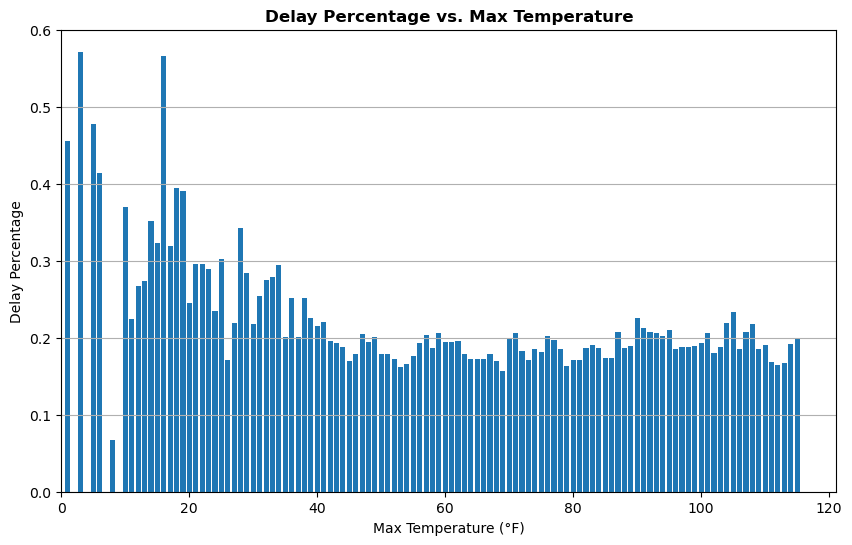

In [126]:
# Wizualizacja 
plt.figure(figsize=(10, 6))
plt.bar(delay_percentage_v2['tmax'], delay_percentage_v2['is_delayed'])
plt.title('Delay Percentage vs. Max Temperature', fontweight='bold')
plt.xlabel('Max Temperature (°F)')
plt.ylabel('Delay Percentage')
plt.grid(axis='y')
plt.xlim(left=0)
plt.show()

In [127]:
# Dokonanie agregacji tmax co 5 stopni
flight_df['tmax'] = flight_df['tmax'].astype(int)
bin_width = 5
max_tmax = flight_df['tmax'].max()

# Tworzenie zakresów dla tmax
custom_bins = list(range(0, max_tmax + bin_width, bin_width))

# Agregacja danych
flight_df['tmax_range'] = pd.cut(flight_df['tmax'], bins=custom_bins, labels=[f'{x}-{x+bin_width-1}' for x in custom_bins[:-1]], ordered=False)

C:\Users\User\AppData\Local\Temp\ipykernel_8020\2534943682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_df['tmax'] = flight_df['tmax'].astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_8020\2534943682.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_df['tmax_range'] = pd.cut(flight_df['tmax'], bins=custom_bins, labels=[f'{x}-{x+bin_width-1}' for x in custom_bins[:-1]], ordered=False)


In [128]:
# Obliczenie odsetka opóźnień lotów dla każdego zakresu temperatury maksymalnej
delay_percentage_agg = flight_df.groupby('tmax_range')['is_delayed'].mean().reset_index()

In [129]:
delay_percentage_agg

,tmax_range,is_delayed
0,0-4,0.470833
1,5-9,0.376344
2,10-14,0.283900
3,15-19,0.354030
4,20-24,0.273898
5,25-29,0.245135
6,30-34,0.256579
7,35-39,0.228609
8,40-44,0.192601
9,45-49,0.191633


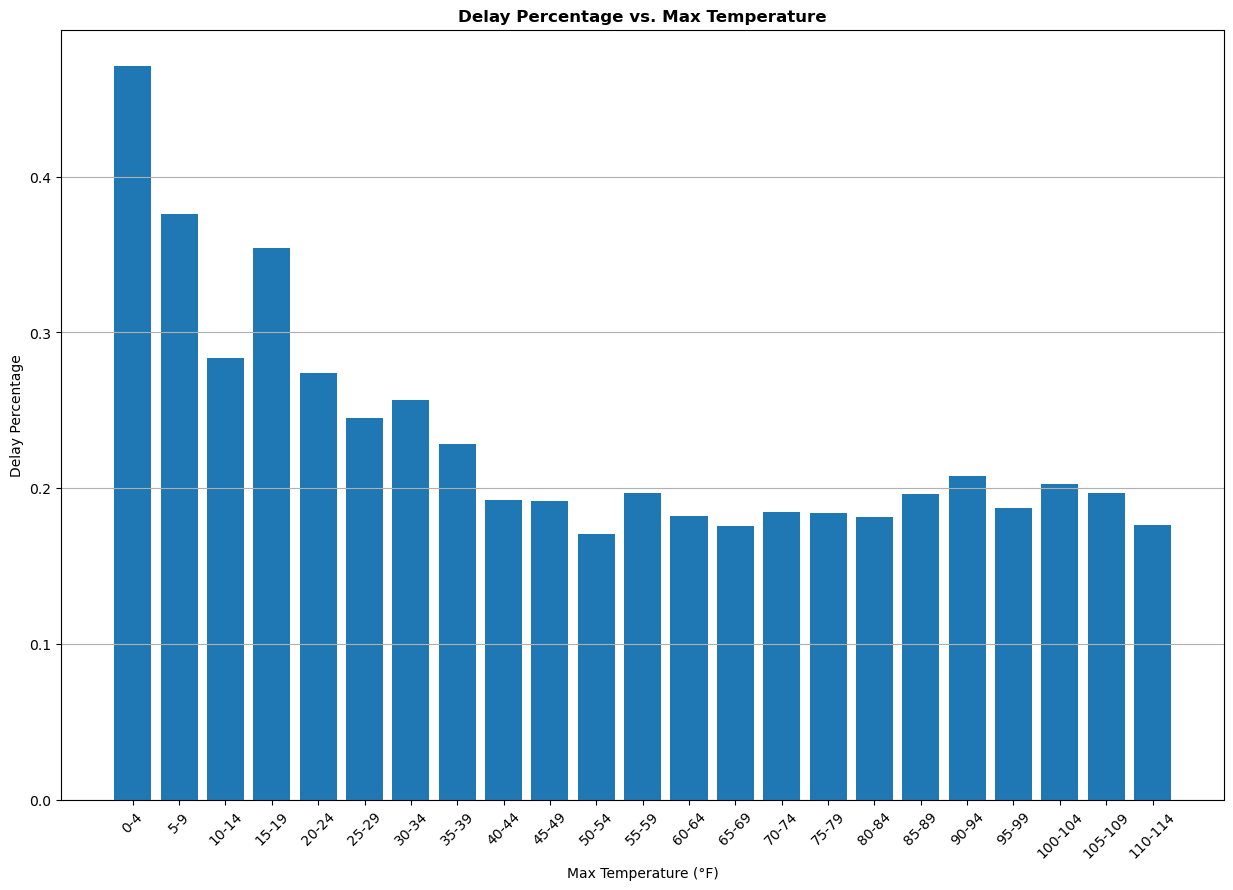

In [130]:
# Wizualizacja 
plt.figure(figsize=(15, 10))
plt.bar(delay_percentage_agg['tmax_range'], delay_percentage_agg['is_delayed'])
plt.title('Delay Percentage vs. Max Temperature', fontweight='bold')
plt.xlabel('Max Temperature (°F)')
plt.ylabel('Delay Percentage')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

## Miejsce na Twój komentarz

# Podsumowanie
W tej części warsztatu dokonaliśmy kompleksowej analizy posiadanego zbioru danych. Eksploracja
pozwoliła nam na zapoznanie się z cechami charakterystycznymi lotów - wiemy już, które 
zmienne mogą mieć wpływ na opóźnienia lotów, a które nie. Co warto podkreślić, skupiliśmy się na wielu
aspektach tej analizy, co otwiera potencjalnie również inne możliwości dalszej pracy nad tą bazą.

W tym momencie przejdziemy do kolejnego kroku, w którym, na podstawie tej analizy, przygotujemy 
system raportowy. Zanim jednak stworzymy dashboard, potrzebujemy zaktualizować naszą bazę danych.